# Analysis of RL08ara experiments by date 

All data from RL08ara was compiled and plotted to try to identify outlier replicates/experiments 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Get the compiled data
df=pd.read_excel('20200912_Finalized_RL08ara_Dataset_with_all_R-OHs.xlsx')

#Function to average replicates and determine standard deviations 
def avg_replicates(data):
    '''The input is a dataframe with "Label" as one of the columns and the propertie to 
    be averaged as the remaining columns 
    
    The outputs are dataframes with the averages and standard deviation 
        '''
    
    possible_labels=sorted(list(set(data['Label'])))
    avg=pd.DataFrame(columns=data.columns.drop('Label'))
    stdev=pd.DataFrame(columns=data.columns.drop('Label'))

    #Go through the dataframe for samples matching the label and average them
    for L in possible_labels:
        new_df=data[data['Label']==L].drop('Label',axis=1)

        avg.loc[L]=new_df.mean(axis=0)
        stdev.loc[L]=new_df.std(axis=0)
        
    return avg,stdev

#Get the averages of all replicates 
avg_titer,err_titer=avg_replicates(df)



Now loop through each experiment and compare the individual measurements to the mean within that experiment, and also to the overall mean

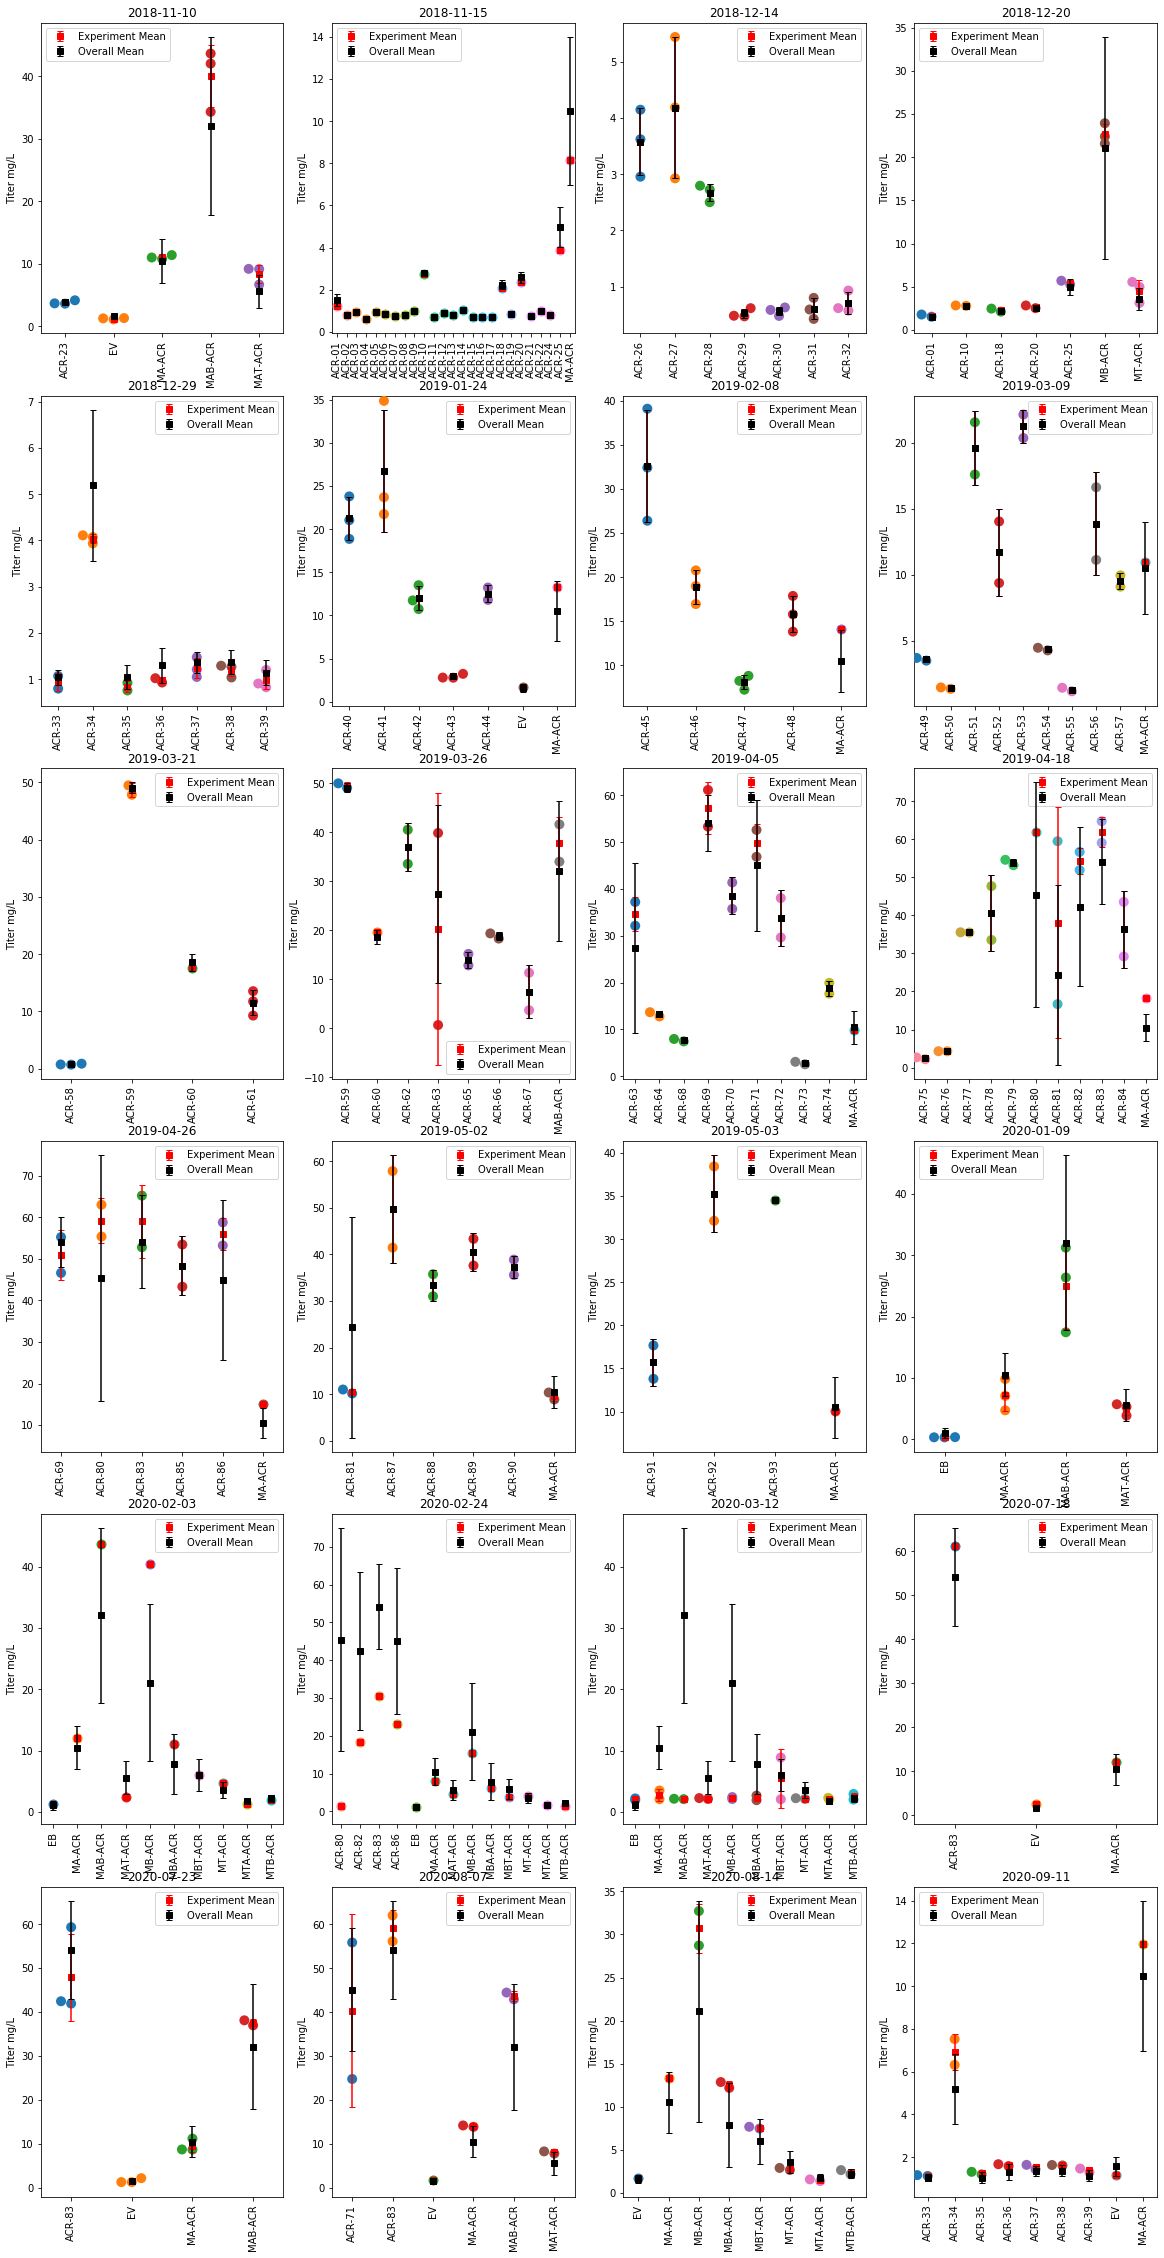

In [3]:
i=1 #counter
plt.figure(figsize=(20,40))
for d in sorted(list(set(df['Date']))):
    
    #Get the data from just one date 
    experiment=df[df['Date']==d]
    
    #Calculate the mean and error 
    exp_avg,exp_err=avg_replicates(experiment)
    
    #Unpack the df to get the coordinates for the swarm plot 
    x=experiment.sort_values('Label')['Label']
    y=experiment.sort_values('Label')['Sum C6-C16']
    
    plt.subplot(6,4,i)
    sns.swarmplot(x,y,size=10) #plot the individual points 
    i+=1 #update counter 
    labels=sorted(list(set(x)))
    ticks=np.arange(len(list(set(x))))
    plt.xticks(ticks=ticks,labels=labels,rotation=90)
    plt.title(str(d).split(' ')[0])
    plt.xlabel('')
    plt.ylabel('Titer mg/L')
    
    #Plot the average and error for replicates within this experiment 
    plt.errorbar(labels,[exp_avg['Sum C6-C16'][L] for L in labels],fmt='s',color='r',yerr=[exp_err['Sum C6-C16'][L] for L in labels],capsize=3,zorder=5,label='Experiment Mean')
               
    #Plot the average from all rounds 
    plt.errorbar(labels, [avg_titer['Sum C6-C16'][L] for L in labels],fmt='s',color='k',yerr=[err_titer['Sum C6-C16'][L] for L in labels],capsize=3,zorder=10,label='Overall Mean')
    
    plt.legend()
    


Based on this analysis, it appears that the experiment on 3/12/2020 consisted largely of outliers. It's possible that the IPTG for this experiment was bad since nothing really appeared to be active. Other experiments may contain outliers (ACR-80 from 2/24/2020, ACR-63 from 3/26/2019). 

2/3/2020, 8/14/2020, and 2/24/2020 contain replicates of all the AHR-ACR fusions. The original fusions (MAB- and MAT-ACR) are present in many more experiments, but data from 8/7/2020 wa

# Analysis of Q values for specific suspected outliers

Do some additional analysis of the samples from 2/24/2020. Use Rorabacher, D. B. (1991) "Statistical Treatment for Rejection of Deviant Values: Critical Values of Dixon Q Parameter and Related Subrange Ratios at the 95 percent Confidence Level". Anal. Chem., 63 (2), 139–146. to look up Q values

In [4]:
def get_qs(titers):
    #Sort the titers 
    sorted_titers=sorted(list(titers)) #Just in case it's a df
    gap_min=sorted_titers[1]-sorted_titers[0]
    gap_max=sorted_titers[-1]-sorted_titers[-2]
    titer_range=sorted_titers[-1]-sorted_titers[0]
    
    q_min=gap_min/titer_range
    q_max=gap_max/titer_range
    #Return the q value for the max and minimum titers in the list
    return [q_min,q_max,len(sorted_titers)]
    


In [5]:
print('Q values for ACR-80')
get_qs(df[df['Label']=='ACR-80']['Sum C6-C16'])

Q values for ACR-80


[0.8758731601658918, 0.019114183126658323, 4]

Looked up Q for n=4 at 95 % confidence level: 0.829. 
The Q value of 0.876 is greater, so this point can be considered an outlier at the 95 % confidence level

In [6]:
print('Q values for ACR-82')
get_qs(df[df['Label']=='ACR-82']['Sum C6-C16'])

Q values for ACR-82


[0.8760000615744764, 0.12399993842552358, 3]

Looked up Q for n=3 at 95 % confidence level: 0.97. The Q value of 0.876 is less, so this point cannot be considered an outlier at the 95 % confidence level. Side note: it is also less than the value of Q for the 80% confidence level (0.886)

In [7]:
print('Q values for ACR-83')
get_qs(df[df['Label']=='ACR-83']['Sum C6-C16'])

Q values for ACR-83


[0.3300384249900316, 0.013154566813411709, 11]

Looked up Q for n=11 at 95 % confidence level: 0.444. The Q value of 0.330 is less, so this point cannot be considered an outlier at the 95 % confidence level. Side note: it is also less than the value of Q for the 80% confidence level (0.332)

In [8]:
print('Q values for ACR-86')
get_qs(df[df['Label']=='ACR-86']['Sum C6-C16'])

Q values for ACR-86


[0.844813200153576, 0.15518679984642406, 3]

Looked up Q for n=3 at 95 % confidence level: 0.97. The Q value of 0.845 is less, so this point cannot be considered an outlier at the 95 % confidence level. Side note: it is also less than the value of Q for the 80% confidence level (0.886)

In [9]:
print('Q values for ACR-63')
get_qs(df[df['Label']=='ACR-63']['Sum C6-C16'])

Q values for ACR-63


[0.8039439837979477, 0.06666185718428234, 4]

Looked up Q for n=4 at 95 % confidence level: 0.829. 
The Q value of 0.804 is less, so this point cannot be considered an outlier at the 95 % confidence level. However, in the model training phase, this point was considered an outlier (I didn't do outlier analysis at that point). Also, at the 90% confidence level Q=.76, so at the 90% confidence level it would be considered an outlier  

# Some conclusions

At the 95% confidence level, the ACR-80 datapoint from 20200224 can be considered an outlier. The other datapoints cannot be considered an outlier at that confidence level

ACR-63 from 3/26/2019 can be considered an outlier at the 90% confidence level